# 16/01/2024 CPI USA and UK

**The CPI is the change in prices of a whole basket of goods and sevices to measure the power of purchase of the citizens in a respective country or region like the US or the UK; allow me to show you a little essay, a coloquial one explain it a little more:**

Ah, the CPI, eh? Imagine it like this, mate: picture yourself down at the local Sainsbury's, trolley piled high with your usual bits and bobs – baked beans, a cheeky bit of fish and chips, maybe a new brew kettle for good measure. Now, imagine coming back next month, that same trolley costing a quid or two more. That, in a nutshell, is the **Consumer Price Index.**

The clever chaps at the **Office for National Statistics (ONS)** keep tabs on the prices of **a whole basket of goodies** like yours, from bangers and mash to mobile phone bills. Each month, they compare those prices to what they were before, giving us a bit of a gauge on how much dearer the whole shebang's getting. It's like a national price-checker, telling us if our quid's still stretching as far as it used to.

Now, why's it all so important? Well, the CPI's a bit like **a canary in the coal mine for the economy**. If it's chirping away about prices soaring, it's a sign things might be heating up a bit – **inflation, they call it**. The Bank of England might need to put the brakes on things to cool it down, or the government might step in with a bit of extra help for folks struggling with the rising cost of living.

On the flip side, if the CPI's nice and quiet, it means prices are staying steady and folks can breathe a bit easier. So, there you have it, the CPI: a simple bit of shopping maths turned into a vital measure of the nation's economic health. Keep an eye on it, and you'll always know whether your budget's feeling flush or facing a squeeze.

And remember, even if the price of baked beans goes up a pence or two, there's always a good cuppa to cheer you up. Chin up, and carry on!

# The goal of this project is to compare the CPI of the US and the CPI of the UK, who is performing better keeping inflation away? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

The data comes from the investing webpage: https://es.investing.com/economic-calendar/cpi-67

# CPI USA

In [2]:
CPI_USA = pd.read_excel("CPI_USA/CPI_USA.xlsx")
CPI_USA.head()

,Release Date,Unnamed: 1,Time,Unnamed: 3,Unnamed: 4,Unnamed: 5,Actual,Forecast,Unnamed: 8,Unnamed: 9,Unnamed: 10,Previous
0,"Jan 11, 2024 (Dec)",NaN,13:30,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,0.001
1,"Dec 12, 2023 (Nov)",NaN,13:30,NaN,NaN,NaN,0.001,0,NaN,NaN,NaN,0
2,"Nov 14, 2023 (Oct)",NaN,13:30,NaN,NaN,NaN,0,0.001,NaN,NaN,NaN,0.004
3,"Oct 12, 2023 (Sep)",NaN,12:30,NaN,NaN,NaN,0.004,0.003,NaN,NaN,NaN,0.006
4,"Sep 13, 2023 (Aug)",NaN,12:30,NaN,NaN,NaN,0.006,0.006,NaN,NaN,NaN,0.002


In [3]:
CPI_USA.columns

Index(['Release Date', 'Unnamed: 1', 'Time', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Actual', 'Forecast', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Previous'],
      dtype='object')

In [4]:
CPI_USA = CPI_USA[["Release Date", "Time", "Actual", "Forecast", "Previous"]]
CPI_USA.head()

,Release Date,Time,Actual,Forecast,Previous
0,"Jan 11, 2024 (Dec)",13:30,NaN,0.002,0.001
1,"Dec 12, 2023 (Nov)",13:30,0.001,0,0
2,"Nov 14, 2023 (Oct)",13:30,0,0.001,0.004
3,"Oct 12, 2023 (Sep)",12:30,0.004,0.003,0.006
4,"Sep 13, 2023 (Aug)",12:30,0.006,0.006,0.002


Let's see how many null values we have.

In [5]:
CPI_USA.isnull().sum() # we are interested in the actual column

Release Date     13
Time            649
Actual           14
Forecast        451
Previous         14
dtype: int64

In [6]:
CPI_USA.loc[CPI_USA.isnull()["Actual"] == True] # these are the null values which are just white spaces

,Release Date,Time,Actual,Forecast,Previous
0,"Jan 11, 2024 (Dec)",13:30,NaN,0.002,0.001
59,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN
341,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN,NaN


In [7]:
CPI_USA = CPI_USA.loc[CPI_USA.isnull()["Actual"] != True]
CPI_USA.isnull().sum()

Release Date      0
Time            636
Actual            0
Forecast        438
Previous          1
dtype: int64

As we can see we don't have any more null values in the actual column which is our distribution data column we want to see. 

# CPI UK

In [8]:
pd.read_excel("CPI_UK/CPI_UK.xlsx").head()

,Release Date,Time,Actual,Unnamed: 3,Unnamed: 4,Forecast,Unnamed: 6,Previous
0,"Jan 17, 2024 (Dec)",02:00,NaN,NaN,NaN,NaN,NaN,-0.002
1,"Dec 20, 2023 (Nov)",02:00,-0.002,NaN,NaN,0.002,NaN,0.000
2,"Nov 15, 2023 (Oct)",02:00,0.000,NaN,NaN,0.001,NaN,0.005
3,"Oct 18, 2023 (Sep)",01:00,0.005,NaN,NaN,0.005,NaN,0.003
4,"Sep 20, 2023 (Aug)",01:00,0.003,NaN,NaN,0.007,NaN,-0.004


In [9]:
CPI_UK = pd.read_excel("CPI_UK/CPI_UK.xlsx")
CPI_UK.columns

Index(['Release Date', 'Time', 'Actual', 'Unnamed: 3', 'Unnamed: 4',
       'Forecast', 'Unnamed: 6', 'Previous'],
      dtype='object')

In [10]:
CPI_UK = CPI_UK[["Release Date", "Time", "Actual", "Forecast", "Previous"]]
CPI_UK.head()

,Release Date,Time,Actual,Forecast,Previous
0,"Jan 17, 2024 (Dec)",02:00,NaN,NaN,-0.002
1,"Dec 20, 2023 (Nov)",02:00,-0.002,0.002,0.000
2,"Nov 15, 2023 (Oct)",02:00,0.000,0.001,0.005
3,"Oct 18, 2023 (Sep)",01:00,0.005,0.005,0.003
4,"Sep 20, 2023 (Aug)",01:00,0.003,0.007,-0.004


In [11]:
CPI_UK.isnull().sum() # in the actual column we have just one null value

Release Date      0
Time              0
Actual            1
Forecast        290
Previous          1
dtype: int64

In [12]:
CPI_UK.loc[1: , :].head()
# this date hasn't come yet by the time I am working on this project
# we are going to select only the rows that contains a value in the Actual column

,Release Date,Time,Actual,Forecast,Previous
1,"Dec 20, 2023 (Nov)",02:00,-0.002,0.002,0.000
2,"Nov 15, 2023 (Oct)",02:00,0.000,0.001,0.005
3,"Oct 18, 2023 (Sep)",01:00,0.005,0.005,0.003
4,"Sep 20, 2023 (Aug)",01:00,0.003,0.007,-0.004
5,"Aug 16, 2023 (Jul)",01:00,-0.004,-0.005,0.001


In [13]:
CPI_UK = CPI_UK.loc[1: , :]
CPI_UK.head()

,Release Date,Time,Actual,Forecast,Previous
1,"Dec 20, 2023 (Nov)",02:00,-0.002,0.002,0.000
2,"Nov 15, 2023 (Oct)",02:00,0.000,0.001,0.005
3,"Oct 18, 2023 (Sep)",01:00,0.005,0.005,0.003
4,"Sep 20, 2023 (Aug)",01:00,0.003,0.007,-0.004
5,"Aug 16, 2023 (Jul)",01:00,-0.004,-0.005,0.001


Managing the values of the actual columns:

When I extract the data from excel to this jupyter notebook the actual column data is divided by 100 for each value, so i need to reverse that. 

In [14]:
CPI_USA["Actual"].head()

1    0.001
2        0
3    0.004
4    0.006
5    0.002
Name: Actual, dtype: object

In [15]:
CPI_USA["Actual"] = CPI_USA["Actual"] * 100
CPI_USA["Actual"].head()

1    0.1
2      0
3    0.4
4    0.6
5    0.2
Name: Actual, dtype: object

In [16]:
CPI_UK["Actual"].head()

1   -0.002
2    0.000
3    0.005
4    0.003
5   -0.004
Name: Actual, dtype: float64

In [17]:
CPI_UK["Actual"] = CPI_UK["Actual"] * 100
CPI_UK["Actual"].head()

1   -0.2
2    0.0
3    0.5
4    0.3
5   -0.4
Name: Actual, dtype: float64

Transforming data string into floats

In [18]:
CPI_UK["Actual"] = CPI_UK["Actual"].astype(float)

In [19]:
CPI_USA = CPI_USA.loc[CPI_USA["Actual"].str.isdigit() != False, :]

In [20]:
CPI_USA["Actual"] = CPI_USA["Actual"].astype(float)

# Descriptive statistc

We are going to see their distributions, measures of central tendency, spread and outliers as well as skewness in a observational study.

In [21]:
max_uk = CPI_UK["Actual"].describe().loc["max"]
min_uk = CPI_UK["Actual"].describe().loc["min"]

range_cpi_uk = max_uk - min_uk

In [22]:
range_cpi_uk / 0.5 # if we want a lenght of 0.5 per bin we need around of 9 buckets

8.600000000000001

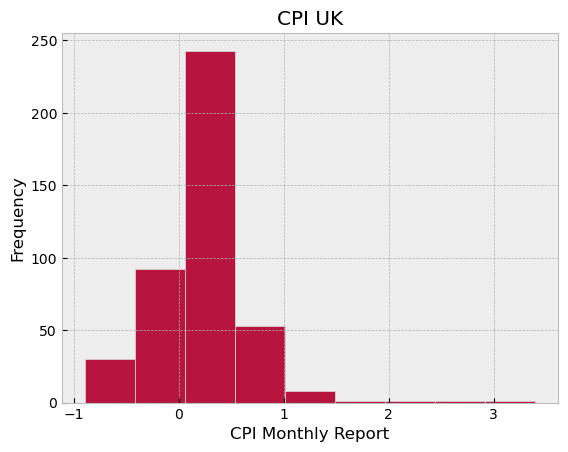

In [23]:
plt.hist(CPI_UK["Actual"], edgecolor = "#dcdde1", color = "#b71540", bins = 9)
plt.title("CPI UK")
plt.xlabel("CPI Monthly Report")
plt.ylabel("Frequency")
plt.show()

**Looks like we have for the UK right skew data, they don't want to go high, chirping away about prices soaring**

In [24]:
new_index = []
for i in range(len(CPI_UK["Actual"])):
    new_index.append(i)

In [25]:
old_index_uk = CPI_UK["Actual"].index 
# we are going to save this old index to match the dataframe when we are going to see the outliers

In [26]:
CPI_UK["Actual"].index = new_index

Plotting a box plot for the CPI in the UK

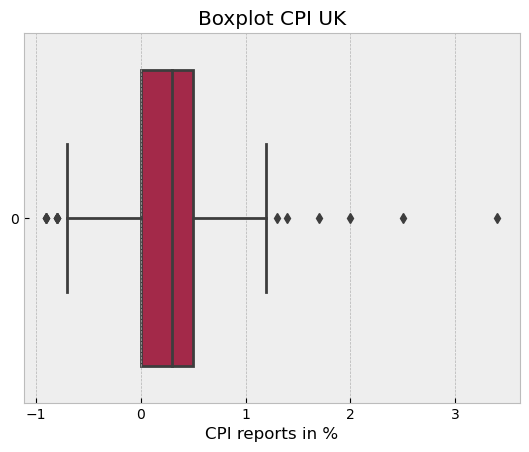

In [27]:
sns.boxplot(CPI_UK["Actual"], orient = "h", color = "#b71540")
plt.title("Boxplot CPI UK")
plt.xlabel("CPI reports in %")
plt.show()

We have many outliers on the right side according to the 1.5 estandard of outlier identification

In [28]:
CPI_UK["Actual"].describe()

count    430.000000
mean       0.235349
std        0.436458
min       -0.900000
25%        0.000000
50%        0.300000
75%        0.500000
max        3.400000
Name: Actual, dtype: float64

# Now it is time for the USA, its distribution, measures of central tendency and spread of the data

In [29]:
max_usa = CPI_USA["Actual"].describe().loc["max"]
min_usa = CPI_USA["Actual"].describe().loc["min"]

range_cpi_usa = max_usa - min_usa

In [30]:
range_cpi_usa / 0.5 # if we want a lenght of 0.5 per bin we need around of 7 buckets

7.0

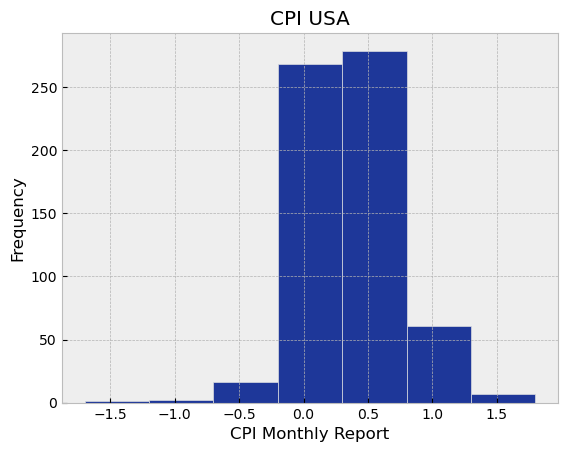

In [31]:
plt.hist(CPI_USA["Actual"], edgecolor = "#dcdde1", color = "#1e3799", bins = 7)
plt.title("CPI USA")
plt.xlabel("CPI Monthly Report")
plt.ylabel("Frequency")
plt.show()

**The US has had lower inflation levels than the UK, this can indicate that the americans have had more deflations than the birtish citizens**

Now we are goin to plot the boxplot for the CPI in the US

In [32]:
new_index_usa = []
for i in range(len(CPI_USA["Actual"])):
    new_index_usa.append(i)

old_index_usa = CPI_USA["Actual"].index 
# we are going to save this old index to match the dataframe when we are going to see the outliers

CPI_USA["Actual"].index = new_index_usa

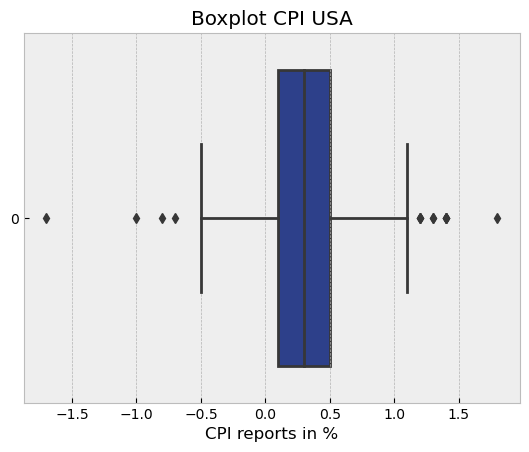

In [33]:
sns.boxplot(CPI_USA["Actual"], orient = "h", color = "#1e3799")
plt.title("Boxplot CPI USA")
plt.xlabel("CPI reports in %")
plt.show()

We have outliers on both sides but we have a larger spread of the data from the left side of the boxplot

In [34]:
CPI_USA["Actual"].describe()

count    634.000000
mean       0.325552
std        0.338209
min       -1.700000
25%        0.100000
50%        0.300000
75%        0.500000
max        1.800000
Name: Actual, dtype: float64

In fact we can compare this description and 5 figure approach with the two data sets in our observational study

In [35]:
description = pd.concat([CPI_USA["Actual"].describe(), CPI_UK["Actual"].describe()], axis = 1)

In [36]:
description.columns.values[0] = "USA"
description.columns.values[1] = "UK"

In [37]:
description

,USA,UK
count,634.000000,430.000000
mean,0.325552,0.235349
std,0.338209,0.436458
min,-1.700000,-0.900000
25%,0.100000,0.000000
50%,0.300000,0.300000
75%,0.500000,0.500000
max,1.800000,3.400000


Many of the measures for these two datasets are similar like the mean, the standard deviation (std) and even the quartiles, however the UK has higher rate of inflation than the US and the US has lower reports indicating certain level of deflation the UK does not have.  

Let's see the interquartile range of these two datasets.

In [38]:
description.iloc[6, 0] 

0.5

In [39]:
USA_IQR = description.iloc[6, 0] - description.iloc[4, 0]
UK_IQR = description.iloc[6, 1] - description.iloc[4, 1]

In [40]:
USA_IQR

0.4

In [41]:
UK_IQR

0.5

**We have more data from the USA because investing webpage has data since 1970 and for the UK since 1988**

We have a question: What is the preferred range of the CPI for our societies?

Generally preferred range:

 + 1-3%: This range is often considered ideal for several reasons:

1. **Low and stable inflation:** Prices rise slowly and predictably, allowing for confident budgeting and economic planning.

2. **Balanced growth:** Modest inflation can incentivize businesses to invest and innovate while protecting consumers from deflationary pressures that can stagnate the economy.

3. **Wage adjustments:** Wages can gradually adjust to keep pace with price increases, maintaining purchasing power.

**European perspective:**

The European Central Bank (ECB) targets an inflation rate of **"below, but close to, 2%"** over the medium term. This reflects a focus on price stability while acknowledging the potential benefits of low, positive inflation.

Some European countries, particularly those with a history of high inflation, might prioritize even lower CPI ranges closer to 1%.

Concerns about deflation and stagnant economic growth in recent years have made maintaining some level of inflation more important in Europe.

**North American perspective:**

The Federal Reserve has a dual mandate of achieving maximum employment and stable prices. While no explicit inflation target is set, the Fed generally aims for an inflation rate **around 2%.**

Some economists in North America **argue for a slightly higher inflation target of 3-4%**, citing potential benefits for economic growth and debt reduction.

Concerns about income inequality and the impact of inflation on low-income earners can lead to calls for lower CPI targets in North America.

**It's important to remember:**

These are general trends, and individual opinions within both Europe and North America can vary widely.

The "best" CPI range ultimately depends on various factors, including the specific economic circumstances of each country, its long-term goals, and the risk tolerance of its citizens.

Striking a balance between price stability, economic growth, and social well-being remains a complex challenge for policymakers on both sides of the Atlantic.

**What about the skewness of these two datasets?** 

In [42]:
from scipy import stats

In [43]:
round(stats.skew(CPI_USA["Actual"]), 2)

0.19

In [44]:
round(stats.skew(CPI_UK["Actual"]), 2)

1.13

The americans have a more normal dataset, however, the british have a history of higher levels of CPI and inflation according to these two datasets, the british dataset is right skewed considerably more than the american one. 

# Outliers

**Every observation that is < Q1 - 1.5(IQRQ) is an outlier as well as > Q3 + 1.5(IQR) as a generalized standard**

In [45]:
description # need to remember this dataframe

,USA,UK
count,634.000000,430.000000
mean,0.325552,0.235349
std,0.338209,0.436458
min,-1.700000,-0.900000
25%,0.100000,0.000000
50%,0.300000,0.300000
75%,0.500000,0.500000
max,1.800000,3.400000


In [46]:
Q1_USA = description.iloc[4, 0]
Q3_USA = description.iloc[6, 0]

Q1_UK = description.iloc[4, 1]
Q3_UK = description.iloc[6, 1]

In [47]:
CPI_USA.index = old_index_usa
CPI_UK.index = old_index_uk

In [48]:
CPI_USA[CPI_USA["Actual"] < Q1_USA - (1.5 * USA_IQR)] # We had some recesions in 2008-2009 and 2020

,Release Date,Time,Actual,Forecast,Previous
44,"May 12, 2020 (Apr)",NaN,-0.8,-0.008,-0.004
183,"Jan 16, 2009",NaN,-0.7,-0.009,-0.017
184,"Dec 16, 2008",NaN,-1.7,-0.012,-0.01
185,"Nov 19, 2008",NaN,-1.0,-0.008,0


In [49]:
CPI_USA[CPI_USA["Actual"] > Q3_USA + (1.5 * USA_IQR)] 
# we had higher inflation on those days of Richard Nixon in office as well as the previous year 2022

,Release Date,Time,Actual,Forecast,Previous
18,"Jul 13, 2022 (Jun)",NaN,1.3,0.011,0.01
21,"Apr 12, 2022 (Mar)",NaN,1.2,0.012,0.008
223,"Oct 14, 2005 (Sep)",NaN,1.4,NaN,0.006
536,"Apr 01, 1980 (Mar)",NaN,1.4,NaN,0.013
537,"Mar 01, 1980 (Feb)",NaN,1.3,NaN,0.014
538,"Feb 01, 1980 (Jan)",NaN,1.4,NaN,0.012
539,"Jan 01, 1980 (Dec)",NaN,1.2,NaN,0.011
603,"Oct 01, 1974 (Sep)",NaN,1.4,NaN,0.012
604,"Sep 01, 1974 (Aug)",NaN,1.2,NaN,0.006
616,"Sep 01, 1973 (Aug)",NaN,1.8,NaN,0


What about the UK? Remember that we don't have data for the 70s in the UK, maybe the inflation was high too back then. 

In [50]:
CPI_UK[CPI_UK["Actual"] < Q1_UK - (1.5 * UK_IQR)] 

,Release Date,Time,Actual,Forecast,Previous
59,"Feb 13, 2019 (Jan)",04:30,-0.8,-0.007,0.002
95,"Feb 16, 2016 (Jan)",04:30,-0.8,-0.007,0.001
107,"Feb 17, 2015 (Jan)",04:30,-0.9,-0.008,0.000
203,"Feb 01, 2007 (Jan)",04:00,-0.8,NaN,0.006
269,"Aug 01, 2001 (Jul)",04:00,-0.8,NaN,0.002
275,"Feb 01, 2001 (Jan)",04:00,-0.9,NaN,0.000
287,"Feb 01, 2000 (Jan)",04:00,-0.9,NaN,0.003


In [51]:
CPI_UK[CPI_UK["Actual"] > Q3_UK + (1.5 * UK_IQR)] 
# The John Mayor period in the Uk was the highest record of inflation they have ever had monthly

,Release Date,Time,Actual,Forecast,Previous
14,"Nov 16, 2022 (Oct)",02:00,2.0,0.017,0.005
20,"May 18, 2022 (Apr)",01:00,2.5,0.026,0.011
392,"May 01, 1991 (Apr)",04:00,3.4,NaN,0.003
404,"May 01, 1990 (Apr)",04:00,1.7,NaN,0.006
416,"May 01, 1989 (Apr)",04:00,1.4,NaN,0.005
428,"May 01, 1988 (Apr)",04:00,1.3,NaN,0.003


**Can we use these datsets to make inferences?**

In [52]:
len(CPI_UK)

430

While **a skewness of 0 indicates a perfectly symmetrical distribution**, a skewness of **0.19 for the USA CPI datset is considered relatively mild**. This suggests that our dataset is not extremely skewed, which makes it more likely for the Central Limit theorem (CLT) to hold.


A **skewness of 1.13 for the UK CPI** in our dataset suggests a more significant deviation from normality than a value of **0.19.** For the UK we have **5 outliers on the right** and 5 / 430 data observations for the UK is equal to 0.011, so we have **less than 2% of the outliers in the overall data**, let's remove them and see if our skewness changes for a more effective approach with the central limit theorem. 

We are more interested in removing the higher outliers in the Uk because this Kingdom is characterized for having certain moments where they have had higher levels of inflation than the USA, and even doing this it will be a rigther skewed dataset than the USA regarding CPI. 

In [53]:
CPI_UK = CPI_UK[CPI_UK["Actual"] < Q3_UK + (1.5 * UK_IQR)]

In [54]:
round(stats.skew(CPI_UK["Actual"]), 2) # we reduced the skewness to -0.46% which is better

-0.46

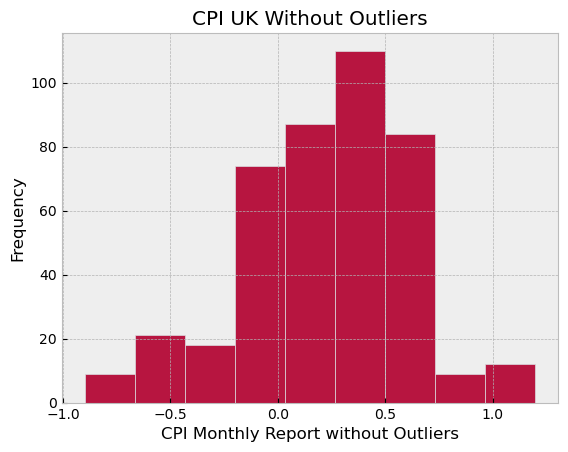

In [55]:
plt.hist(CPI_UK["Actual"], edgecolor = "#dcdde1", color = "#b71540", bins = 9)
plt.title("CPI UK Without Outliers")
plt.xlabel("CPI Monthly Report without Outliers")
plt.ylabel("Frequency")
plt.show()

Better normalized. Now it is time to save these files to apply inferences later.

In [56]:
CPI_USA["Actual"].to_csv("CPI_USA.csv")
CPI_UK["Actual"].to_csv("CPI_UK.csv")